# Delayed tasks analysis


### Convert notebook to python
```
bash
jupyter nbconvert "D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical\nb20230202_145400_delayed_tasks_and_316_photometry.ipynb" --to="python" --output-dir="D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical" --output="nb20230202_145400_delayed_tasks_and_316_photometry"
```

Quick analysis of instrumental reaching

In [43]:
# allow for automatic reloading of classes and function when updating the code
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Variables

In [44]:
import pandas as pd
from pathlib import Path
trial_window = [-2000, 4000] # in ms

# time limit around trigger to perform an event
# determine successful trials
# timelim = [1000, 4000] # in ms

# Digital channel nb of the pyphotometry device
# on which rsync signal is sent (from pycontrol device)
rsync_chan = 2

basefolder = Path(os.getcwd()).parent.parent

# These must be absolute paths
# use this to use within package tasks files (in params)
tasksfile = Path(basefolder,'params','tasks_params.csv')
# use this to put a local full path
#tasksfile = -r'C:/.../tasks_params.csv' 

# from sample_data

# # From jade
# photometry_dir = Path('/home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/photometry')
# pycontrol_dir = Path('/home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/pycontrol')

# From julien-pc
photometry_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\pyphotometry\data\reaching_go_spout_bar_nov22'
pycontrol_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\pycontrol\reaching_go_spout_bar_nov22'

#From laptop
# photometry_dir = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pyphotometry\reaching_go_spout_incr_break2_nov22'
# pycontrol_dir = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pycontrol\reaching_go_spout_incr_break2_nov22'

video_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\videos'
tasks = pd.read_csv(tasksfile, usecols=[1, 2, 3, 4], index_col=False)


### Create an experiment object


In [45]:
# Load all raw text sessions in the indicated folder or a sessions.pkl file
# if already existing in folder_path
exp_cohort = Experiment(path=pycontrol_dir, int_subject_IDs=True, update=True, verbose=True)

Saved sessions loaded from: sessions.pkl
Unable to import file: v-2022-11-26-150859.txt
invalid literal for int() with base 10: ''
session nb:  1 0 2022-11-19 17:58:51 reaching_go_spout_bar_nov22
session nb:  2 0 2022-11-19 17:59:45 reaching_go_spout_bar_nov22
session nb:  3 0 2022-11-19 18:10:19 reaching_go_spout_bar_nov22
session nb:  4 0 2022-11-19 18:17:41 reaching_go_spout_bar_nov22
session nb:  5 0 2022-11-19 18:19:36 reaching_go_spout_bar_nov22
session nb:  6 0 2022-11-19 18:25:34 reaching_go_spout_bar_nov22
session nb:  7 0 2022-11-19 18:26:09 reaching_go_spout_bar_nov22
session nb:  8 0 2022-11-19 18:26:36 reaching_go_spout_bar_nov22
session nb:  9 0 2022-11-19 18:35:34 reaching_go_spout_bar_nov22
session nb:  10 0 2022-11-19 18:38:56 reaching_go_spout_bar_nov22
session nb:  11 0 2022-11-19 18:40:03 reaching_go_spout_bar_nov22
session nb:  12 0 2022-11-19 18:41:07 reaching_go_spout_bar_nov22
session nb:  13 0 2022-11-21 14:00:02 reaching_go_spout_nov22
session nb:  14 0 2022-1

In [46]:
exp_cohort.sessions = [session for session in exp_cohort.sessions if (session.subject_ID == 604, 602)]

### Perform extraction of behavioural information by trial

In [47]:
exp_cohort.sessions[11].get_session_by_trial(trial_window=trial_window, timelim=[0,1000], tasksfile=tasksfile)

In [48]:
# Process the whole experimental folder by trials

trial_window = [-4000,6000]
exp_cohort.process_exp_by_trial(trial_window, timelim=None, tasksfile=tasksfile, verbose=True)

# Save the file as sessions.pkl in folder_path
# exp_cohort.save()

file too short to process (likely aborted session):                 0 2022-11-19 17:58:51 reaching_go_spout_bar_nov22
processing by trial: 00-2022-11-19-175945.txt task: reaching_go_spout_bar_nov22
file too short to process (likely aborted session):                 0 2022-11-19 18:10:19 reaching_go_spout_bar_nov22
file too short to process (likely aborted session):                 0 2022-11-19 18:17:41 reaching_go_spout_bar_nov22
file too short to process (likely aborted session):                 0 2022-11-19 18:19:36 reaching_go_spout_bar_nov22
file too short to process (likely aborted session):                 0 2022-11-19 18:25:34 reaching_go_spout_bar_nov22
file too short to process (likely aborted session):                 0 2022-11-19 18:26:09 reaching_go_spout_bar_nov22
processing by trial: 00-2022-11-19-182636.txt task: reaching_go_spout_bar_nov22
processing by trial: 00-2022-11-19-183534.txt task: reaching_go_spout_bar_nov22
processing by trial: 00-2022-11-19-183856.txt task: 

In [49]:
len(exp_cohort.sessions)

308

### df_conditions dataframe (metadata for single session)

In [50]:
exp_cohort.sessions[0].df_conditions

,break_after_abort,US_end_timer,water_on,water by bar_off,water by spout,water for free,water success,busy_win_timer,spout,button_press,waiting_for_spout,trigger,valid,success,uid
1,False,True,True,False,False,False,True,True,True,False,True,hold_for_water,False,True,0_2022-11-19_17:59:45_1
2,False,True,True,False,False,False,True,False,True,False,True,hold_for_water,True,True,0_2022-11-19_17:59:45_2
3,False,True,True,False,False,False,True,True,True,False,True,hold_for_water,True,False,0_2022-11-19_17:59:45_3


### Conditions for delayed go

In [51]:
# Defime each trial type as a dictionary of conditions to be met
conditions_dict1 = {'trigger': 'hold_for_water', 'success': True, 'water by spout': True}

# conditions_dict2 = {'trigger': 'hold_for_water', 'success': False, 'hold_timer': True}

conditions_dict2 = {'trigger': 'hold_for_water', 'success': False, 'break_after_abort': True}

# conditions_dict2 = {'trigger': 'hold_for_water', 'spout':False, 'valid': True, 'busy_win_timer': False, 'button_press': False}

# Aggregate all condition dictionaries in a list
conditions_list = [conditions_dict1, conditions_dict2]
# Aliases for conditions
cond_aliases = ['Go - hold hit', 'Go - aborted']
# Groups as a list of lists
# groups = [[280, 281, 282, 289],[295, 282, 284, 285, 292, 297]]
groups = None


## Match and synchronize photometry to behaviour

In [52]:
# Find if there is a matching photometry file:
exp_cohort.match_sessions_to_files(photometry_dir, ext='ppd')

# rsync synchronization pulses matching between behaviour and photometry
exp_cohort.sync_photometry_files(2)
exp_cohort.save()

c:\Users\ndcn1349\Anaconda3\envs\trialexp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ndcn1349\Anaconda3\envs\trialexp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ndcn1349\Anaconda3\envs\trialexp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ndcn1349\Anaconda3\envs\trialexp\lib\site-packages\sklearn\cluster\_kmeans.p

saved \\ettin\Magill_Lab\Julien\Data\head-fixed\pycontrol\reaching_go_spout_bar_nov22\sessions.pkl


In [53]:
photo_dataset = exp_cohort.get_photometry_groups(
        groups = None, # or use groups variable defined above
        conditions_list = conditions_list, 
        cond_aliases = cond_aliases,
        trial_window = trial_window,
        when = 'all', 
        task_names = ['reaching_go_spout_bar_mar23'],
        trig_on_ev = None, # align to the first event of a kind e.g. bar_off
        last_before = None,
        baseline_low_pass = 0.001, 
        low_pass = 10, 
        median_filt = 3,
        motion_corr = True, 
        df_over_f = True,
        z_score = True, 
        downsampling_factor = 10, 
        export_vars = ['analog_1_df_over_f', 'zscored_df_over_f'], 
        # remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
        verbose = True) # will plot all the process of remove_artifacts if remove_artifacts == True


Processing subject 603 at: 2023-03-21 15:29:00
condition 0 trials: 31
Processing subject 603 at: 2023-03-24 08:39:53
condition 0 trials: 46
condition 1 trials: 20
Processing subject 603 at: 2023-03-29 08:38:20
condition 0 trials: 6
condition 1 trials: 16
Processing subject 58 at: 2023-03-14 16:51:10
condition 0 trials: 1
condition 1 trials: 1
Processing subject 58 at: 2023-03-15 11:43:06
condition 0 trials: 7
condition 1 trials: 15
Processing subject 58 at: 2023-03-16 11:01:34
condition 0 trials: 12
condition 1 trials: 6
Processing subject 58 at: 2023-03-17 08:43:07
condition 0 trials: 16
condition 1 trials: 6
Processing subject 58 at: 2023-03-18 17:10:32
condition 0 trials: 89
condition 1 trials: 25
Processing subject 58 at: 2023-03-19 15:13:57
condition 0 trials: 84
condition 1 trials: 20
Processing subject 58 at: 2023-03-20 13:26:58
condition 0 trials: 14
condition 1 trials: 6
Processing subject 58 at: 2023-03-22 18:26:17
condition 0 trials: 127
condition 1 trials: 71
Processing sub

cond_ID: 0, group_idx 0, subj 58
cond_ID: 0, group_idx 0, subj 61
cond_ID: 0, group_idx 0, subj 63
cond_ID: 0, group_idx 0, subj 602
cond_ID: 0, group_idx 0, subj 603
cond_ID: 0, group_idx 0, subj 604
cond_ID: 1, group_idx 0, subj 58
cond_ID: 1, group_idx 0, subj 61
cond_ID: 1, group_idx 0, subj 63
cond_ID: 1, group_idx 0, subj 602
cond_ID: 1, group_idx 0, subj 603
cond_ID: 1, group_idx 0, subj 604


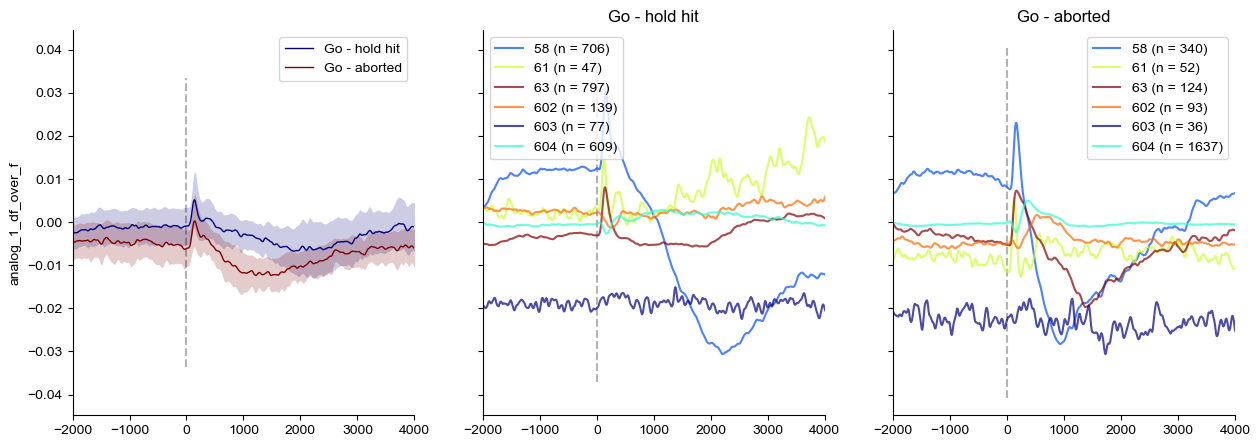

In [54]:
photo_dataset.filter_reset()
photo_dataset.filterout_subjects([60]) # remove kms060
photo_dataset.filter_min_by_session(min_trials = 10)
# photo_dataset.filter_lastNsessions(n = 1)

fig = photo_dataset.lineplot(
    vars = ['analog_1_df_over_f'],
    time_lim = [-2000, 4000],
    # time_unit = 'seconds',
    ylim = None,# [[-1, 5]],# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    error = True,
    colormap = 'jet',
    legend = True,
    plot_subjects = True,
    plot_groups = True,
    liney0 = False,
    linex0 = True,
    figsize = (15, 5),
    dpi = 100,
    verbose = True)

In [55]:

# ev_dataset_mixed_mixed_mixed = exp_cohort.behav_events_to_dataset(
ev_dataset = exp_cohort.behav_events_to_dataset(
    groups=None,
    conditions_list=conditions_list,
    cond_aliases=cond_aliases,
    when='all',
    task_names=['reaching_go_spout_bar_nov22'],
    trig_on_ev=None
)

# ev_dataset.set_trial_window(trial_window=[-4000,6000], unit='milliseconds')
# ev_dataset.set_conditions(conditions=condition_list, aliases=cond_aliases)

In [56]:
#index_by_session = ev_dataset.metadata_df.sort_values(by=['session_nb'], ascending=False).index

#ev_dataset.metadata_df = ev_dataset.metadata_df.iloc[index_by_session]
#ev_dataset.data = ev_dataset.data.iloc[index_by_session]

#ev_dataset.filter_reset()
#ev_dataset.filter_lastNsessions(3)
#ev_dataset.filterout_subjects([58,61,63,313,314,315])

#ev_dataset.data.loc[:,'first_bar_off_trial_time'] = ev_dataset.data['bar_off_trial_time'].apply(lambda x: [find_min_time_list(x)])
#ev_dataset.data.loc[:,'first_spout_trial_time'] = ev_dataset.data['spout_trial_time'].apply(lambda x: [find_min_time_list(x)])
#ev_dataset.plot_raster(keys=['first_bar_off_trial_time','first_spout_trial_time'], module='matplotlib')


In [57]:
# ev_dataset.plot_raster(keys=['first_bar_off_trial_time', 'first_spout_trial_time'], module='matplotlib')
#ev_dataset_nocond = deepcopy(ev_dataset)
#ev_dataset_nocond.filter_min_by_session(10)
#ev_dataset_nocond.filterout_subjects([58,61,63,313,314,315])
#ev_dataset_nocond.filter_lastNsessions(10)
#ev_dataset_nocond.plot_raster(keys=['first_bar_off_trial_time', 'first_spout_trial_time'], module='matplotlib')

Behaviour: Compute distribution

In [58]:
print(ev_dataset.metadata_df.head())


   index  break_after_abort  US_end_timer  water_on  water by bar_off  \
0     14               True          True      True              True   
1     15               True          True      True              True   
2     16               True          True      True              True   
3     17               True          True      True              True   
4     19               True          True      True              True   

   water by spout  water for free  water success  busy_win_timer  spout  ...  \
0            True            True           True            True   True  ...   
1            True            True           True            True   True  ...   
2            True            True           True            True   True  ...   
3            True            True           True            True   True  ...   
4            True            True           True            True   True  ...   

   success                       uid condition_ID     condition  group_ID  \
0  

In [59]:
ev_dataset.filter_reset()
ev_dataset.filter_min_by_session(20)
ev_dataset.filterout_subjects([58,61,63,313,314,315])
# ev_dataset.filter_lastNsessions(3)


dist_as_continuous = ev_dataset.compute_distribution(
        trial_window = [-1999, 6000],
        bin_size = 100, 
        normalize = True,
        per_session = True,
        out_as_continuous = True)
# dist_as_continuous.set_conditions(conditions=conditions_list, aliases=cond_aliases)
# Remove test files
# dist_as_continuous.filterout_subjects([0])

In [60]:
dist_as_continuous.heatmap(
    vars = ['first_bar_off_dist', 'first_spout_dist'],
    time_lim = [-1000, 6000],
    colormap = 'jet'
)

ValueError: Variable(s) not in the dataset: ['first_bar_off_dist' 'first_spout_dist']

Behaviour: Plot distribution

In [ ]:
dist_as_continuous.filter_reset()
ev_dataset.filter_min_by_session(20)
ev_dataset.filterout_subjects([58,61,63,313,314,315])
ev_dataset.filter_lastNsessions(3)

dist_as_continuous = ev_dataset.compute_distribution(
        trial_window = [-1999, 6000],
        bin_size = 100, 
        normalize = True,
        per_session = True,
        out_as_continuous = True)

dist_as_continuous.lineplot(
    vars = [ 'first_bar_off_dist','first_spout_dist'],
    time_lim = [-1000,6000],
    error = True,
    ylim = None,#[[-0.1,1.6]], #[[-0.1, 0.7]], #[[-0.1, 1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    colormap = 'jet',
    legend = True,
    plot_subjects = True,
    plot_groups = True,
    figsize = (15,10),
    dpi = 100,
    verbose = False)
# Return a count of overall number of trials
dist_as_continuous.metadata_df['keep'].value_counts()


## Match and synchronize photometry to behaviour

In [ ]:
# Find if there is a matching photometry file:
exp_cohort.match_sessions_to_files(photometry_dir, ext='ppd')

# rsync synchronization pulses matching between behaviour and photometry
exp_cohort.sync_photometry_files(2)
exp_cohort.save()


Loop to plot photometry trials triggered on different events
- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

In [ ]:

trigs = [None, 'bar_off', 'bar_off', 'spout', 'US_end_timer']
last_befores = [None, None, 'spout', None, None]

photo_dataset = dict()
for idx, trig in enumerate(trigs):
    photo_dataset[idx] = exp_cohort.get_photometry_groups(
            groups = None, # or use groups variable defined above
            conditions_list = conditions_list, 
            cond_aliases = cond_aliases,
            trial_window = trial_window,
            when = 'all', 
            task_names = ['reaching_go_spout_bar_nov22'],
            trig_on_ev = trig, # align to the first event of a kind e.g. bar_off
            last_before = last_befores[idx],
            high_pass = None, 
            low_pass = 45, 
            median_filt = 3,
            motion_corr = True, 
            df_over_f = True,
            z_score = True, 
            downsampling_factor = 10, 
            export_vars = ['analog_1_df_over_f', 'zscored_df_over_f'], 
            # remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
            verbose = True) # will plot all the process of remove_artifacts if remove_artifacts == True



Plot photometry trials triggered on different events based on above extraction
- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

In [ ]:

for idx, trig in enumerate(trigs):

    # keep only 316
    photo_dataset[idx].filter_reset()
    photo_dataset[idx].filterout_subjects([0,1,58,61,63,313,314,315,318])
    photo_dataset[idx].filter_min_by_session(min_trials = 10)
    photo_dataset[idx].filter_lastNsessions(n = 3)
    if idx == 4:
        photo_dataset[idx].filterout_conditions(1)
    photo_dataset[idx].lineplot(
        vars = ['zscored_df_over_f'],
        time_lim = [-3000, 6000],
        # time_unit = 'seconds',
        ylim = [[-1, 5]],# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
        error = True,
        colormap = 'jet',
        legend = True,
        plot_subjects = True,
        plot_groups = True,
        liney0 = False,
        linex0 = True,
        figsize = (15, 5),
        dpi = 100,
        verbose = True)

Same plot, heatmap version:

- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

In [ ]:
phase_labels = ('Cue_onset','First_mov','Mov_bef_spout','Spout','Reward')

for idx, trig in enumerate(trigs):
    photo_dataset[idx].filter_reset()
    photo_dataset[idx].filterout_subjects([0,1,61,63,313,314,315,317,318])
    photo_dataset[idx].filterout_dates([datetime(2023,2,24).date(), datetime(2023,2,23).date()])
    photo_dataset[idx].filter_lastNsessions(n = 1)
    fig = photo_dataset[idx].heatmap(
        vars = ['zscored_df_over_f'],
        time_lim = [-3000, 6000],
        clim_pctile = None,
        colormap = 'jet'
    )   
    photo_dataset[idx].filter_reset()


    file_path = 'C:\\Users\\phar0732\\Documents\\GitHub\\trialexp\\outputs\\' + 'photo_heatmap_' + phase_labels[idx] + '.pdf'
    fig.savefig(file_path)

In [ ]:
photo_dataset[idx].metadata_df

In [ ]:
# From julien-pc
photometry_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\_Other\test_folder\delayed_go\pyphotometry\delayed_go_dual_2022'
pycontrol_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\_Other\test_folder\delayed_go\pycontrol\delayed_go_dual_2022'
trial_window=[-3000,6000]
exp_cohort_mixed = Experiment(path=pycontrol_dir, int_subject_IDs=True, update=True, verbose=True)

In [ ]:
exp_cohort_mixed.process_exp_by_trial(trial_window, timelim=None, tasksfile=tasksfile, verbose=True)


In [ ]:
# Defime each trial type as a dictionary of conditions to be met
conditions_dict1 = {'trigger': 'hold_for_water', 'success': True, 'water by spout': True}

# conditions_dict2 = {'trigger': 'hold_for_water', 'success': False, 'hold_timer': True}

conditions_dict2 = {'trigger': 'hold_for_water', 'success': False, 'break_after_abort': True}

# conditions_dict2 = {'trigger': 'hold_for_water', 'spout':False, 'valid': True, 'busy_win_timer': False, 'button_press': False}

# Aggregate all condition dictionaries in a list
conditions_list = [conditions_dict1, conditions_dict2]
# Aliases for conditions
cond_aliases = ['Go - hold hit', 'Go - aborted']
# Groups as a list of lists
# groups = [[280, 281, 282, 289],[295, 282, 284, 285, 292, 297]]
groups = None


In [ ]:
ev_dataset_mixed = exp_cohort_mixed.behav_events_to_dataset(
        groups = None,
        conditions_list = conditions_list, 
        cond_aliases = cond_aliases, 
        when = 'all', 
        task_names = ['reaching_go_spout_bar_nov22' ,'reaching_go_spout_bar_dual_dec22','reaching_go_spout_bar_all_reward_dec22','reaching_go_spout_bar_all_reward_dec22'], #'pavlovian_nobar_nodelay', #'reaching_go_nogo',
        trig_on_ev = None)

ev_dataset_mixed.set_trial_window(trial_window=[-3000,6000], unit='milliseconds')
# ev_dataset.set_conditions(conditions=condition_list, aliases=cond_aliases)

In [ ]:
index_by_session = ev_dataset_mixed.metadata_df.sort_values(by=['session_nb'], ascending=False).index

ev_dataset_mixed.metadata_df = ev_dataset_mixed.metadata_df.iloc[index_by_session]
ev_dataset_mixed.data = ev_dataset_mixed.data.iloc[index_by_session]

ev_dataset_mixed.filter_reset()
ev_dataset_mixed.filter_lastNsessions(5)
ev_dataset_mixed.filterout_subjects([58,61,63,313,314,315])

ev_dataset_mixed.data.loc[:,'first_bar_off_trial_time'] = ev_dataset_mixed.data['bar_off_trial_time'].apply(lambda x: [find_min_time_list(x)])
ev_dataset_mixed.data.loc[:,'first_spout_trial_time'] = ev_dataset_mixed.data['spout_trial_time'].apply(lambda x: [find_min_time_list(x)])
ev_dataset_mixed.plot_raster(keys=['first_bar_off_trial_time','first_spout_trial_time'], module='matplotlib')


In [ ]:
ev_dataset_mixed.filter_reset()
ev_dataset_mixed.filter_min_by_session(20)
ev_dataset_mixed.filterout_subjects([313,314,315])
# ev_dataset.filter_lastNsessions(3)


dist_as_continuous_mixed = ev_dataset_mixed.compute_distribution(
        trial_window = [-3000, 6000],
        bin_size = 100, 
        normalize = True,
        per_session = True,
        out_as_continuous = True)
# dist_as_continuous.set_conditions(conditions=conditions_list, aliases=cond_aliases)
# Remove test files
# dist_as_continuous.filterout_subjects([0])

In [ ]:
ev_dataset_mixed_no_cond = exp_cohort_mixed.behav_events_to_dataset(
        groups = None,
        conditions_list = None, 
        cond_aliases = None, 
        when = 'all', 
        task_names = ['reaching_go_spout_bar_nov22' ,'reaching_go_spout_bar_dual_dec22','reaching_go_spout_bar_all_reward_dec22','reaching_go_spout_bar_all_reward_dec22'], #'pavlovian_nobar_nodelay', #'reaching_go_nogo',
        trig_on_ev = None)

ev_dataset_mixed_no_cond.set_trial_window(trial_window=[-2000,6000], unit='milliseconds')
# ev_dataset.set_con

index_by_session = ev_dataset_mixed_no_cond.metadata_df.sort_values(by=['session_nb'], ascending=True).index

ev_dataset_mixed_no_cond.metadata_df = ev_dataset_mixed_no_cond.metadata_df.iloc[index_by_session]
ev_dataset_mixed_no_cond.data = ev_dataset_mixed_no_cond.data.iloc[index_by_session]

ev_dataset_mixed_no_cond.filter_reset()
# ev_dataset_mixed_no_cond.filter_lastNsessions(10)
ev_dataset_mixed_no_cond.filterout_subjects([58,61,63,313,314,315])

ev_dataset_mixed_no_cond.data.loc[:,'first_bar_off_trial_time'] = ev_dataset_mixed_no_cond.data['bar_off_trial_time'].apply(lambda x: [find_min_time_list(x)])
ev_dataset_mixed_no_cond.data.loc[:,'first_spout_trial_time'] = ev_dataset_mixed_no_cond.data['spout_trial_time'].apply(lambda x: [find_min_time_list(x)])
ev_dataset_mixed_no_cond.plot_raster(keys=['first_bar_off_trial_time','first_spout_trial_time'], module='matplotlib')

In [ ]:
ev_dataset_mixed_no_cond.filter_reset()
# ev_dataset_mixed_no_cond.filter_lastNsessions(10)
ev_dataset_mixed_no_cond.filter_min_by_session(40)
ev_dataset_mixed_no_cond.filterout_subjects([313,314,315])

dist_as_continuous_mixed_no_cond = ev_dataset_mixed_no_cond.compute_distribution(
        trial_window = [-2000, 6000],
        bin_size = 100, 
        normalize = True,
        per_session = True,
        out_as_continuous = True)

dist_as_continuous_mixed_no_cond.heatmap(
    vars = ['bar_off_dist', 'spout_dist'],
    time_lim = [-2000, 6000],
    colormap = 'jet',
    figsize = (7, 5),
    dpi = 80,
)

In [ ]:
ev_dataset_mixed_no_cond.filter_reset()
ev_dataset_mixed_no_cond.filter_min_by_session(40)
ev_dataset_mixed_no_cond.filterout_subjects([58,61,63,313,314,315])

# ev_dataset_mixed_no_cond.filter_lastNdays(3)
ev_dataset_mixed_no_cond.filter_firstNsessions(3)

dist_as_continuous_mixed_no_cond = ev_dataset_mixed_no_cond.compute_distribution(
        trial_window = [-2000, 6000],
        bin_size = 100, 
        normalize = True,
        per_session = True,
        out_as_continuous = True)

fig, axs, out_df = dist_as_continuous_mixed_no_cond.lineplot(
    vars = [ 'first_bar_off_dist','first_spout_dist'],
    time_lim = [-2000,6000],
    error = True,
    ylim =[[-0.0,1.5],[-0.0,1]], #[[-0.1, 0.7]], #[[-0.1, 1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    colormap = 'jet',
    legend = False,
    plot_subjects = True,
    plot_groups = True,
    figsize = (7,5),
    dpi = 80,
    verbose = False)

fig.savefig(r'C:\Users\phar0732\Documents\GitHub\trialexp\outputs\first_ev_dist_first3s.pdf')

fig = ev_dataset_mixed_no_cond.plot_raster(
    keys=['first_bar_off_trial_time','first_spout_trial_time'], 
    module='matplotlib',
    figsize=(3.25,5))

fig.savefig(r'C:\Users\phar0732\Documents\GitHub\trialexp\outputs\first_ev_raster_first3s.pdf')


In [ ]:
dist_as_continuous_mixed.heatmap(
    vars = ['first_bar_off_dist', 'first_spout_dist'],
    time_lim = [-1000, 6000],
    colormap = 'jet'
)

Behaviour: Plot distribution

In [ ]:
dist_as_continuous_mixed.filter_reset()
ev_dataset_mixed.filter_min_by_session(10)
ev_dataset_mixed.filterout_subjects([58,61,63,313,314,315])
ev_dataset_mixed.filter_lastNsessions(3)

dist_as_continuous_mixed = ev_dataset_mixed.compute_distribution(
        trial_window = [-3000, 6000],
        bin_size = 100, 
        normalize = True,
        per_session = True,
        out_as_continuous = True)

dist_as_continuous_mixed.lineplot(
    vars = [ 'first_bar_off_dist','first_spout_dist'],
    time_lim = [-1000,6000],
    error = True,
    ylim = None,#[[-0.1,1.6]], #[[-0.1, 0.7]], #[[-0.1, 1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    colormap = 'jet',
    legend = True,
    plot_subjects = True,
    plot_groups = True,
    figsize = (15,10),
    dpi = 100,
    verbose = False)
# Return a count of overall number of trials
dist_as_continuous_mixed.metadata_df['keep'].value_counts()


In [ ]:
# Find if there is a matching photometry file:
exp_cohort_mixed.match_sessions_to_files(photometry_dir, ext='ppd')

# rsync synchronization pulses matching between behaviour and photometry
exp_cohort_mixed.sync_photometry_files(2)
exp_cohort_mixed.save()


In [ ]:

trigs = [None, 'bar_off', 'bar_off', 'spout', 'US_end_timer']
last_befores = [None, None, 'spout', None, None]
trial_window = [-4000, 6000]
photo_dataset_mixed = dict()
for idx, trig in enumerate(trigs):
    photo_dataset_mixed[idx] = exp_cohort_mixed.get_photometry_groups(
            groups = None, # or use groups variable defined above
            conditions_list = conditions_list, 
            cond_aliases = cond_aliases,
            trial_window = trial_window,
            when = 'all', 
            task_names = ['reaching_go_spout_bar_nov22'], #'pavlovian_nobar_nodelay', #'reaching_go_nogo',
            trig_on_ev = trig, # align to the first event of a kind e.g. bar_off
            last_before = last_befores[idx],
            high_pass = 0.01, 
            low_pass = 45, 
            median_filt = 3,
            motion_corr = True, 
            df_over_f = True,
            z_score = True, 
            downsampling_factor = 10, 
            export_vars = ['analog_1_df_over_f', 'zscored_df_over_f'], 
            # remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
            verbose = True) # will plot all the process of remove_artifacts if remove_artifacts == True



Plot photometry trials triggered on different events based on above extraction
- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

In [ ]:
phase_labels = ('Cue_onset','First_mov','Mov_bef_spout','Spout','Reward')

for idx, trig in enumerate(trigs):

    photo_dataset_mixed[idx].filter_reset()
    photo_dataset_mixed[idx].filterout_subjects([0,1,58,63,313,314,315,318])
    photo_dataset_mixed[idx].filter_min_by_session(min_trials = 10)
    photo_dataset_mixed[idx].filter_lastNdays(n = 3)
    if idx == 4:
        figsize = (9.75, 5)
    else:
        figsize = (15, 5)

    fig, axs, out_df = photo_dataset_mixed[idx].lineplot(
        vars = ['zscored_df_over_f'],
        time_lim = [-500, 500],
        # time_unit = 'seconds',
        ylim = [[-1, 5]],# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
        error = True,
        colormap = 'jet',
        legend = True,
        plot_subjects = True,
        plot_groups = True,
        liney0 = False,
        linex0 = True,
        figsize = figsize,
        dpi = 100,
        verbose = False)

    file_path = 'C:\\Users\\phar0732\\Documents\\GitHub\\trialexp\\outputs\\' + 'photo_ave_' + phase_labels[idx] + '.pdf'
    fig.savefig(file_path)

In [ ]:
# for idx, trig in enumerate(trigs):
#     photo_dataset_mixed[idx].filter_reset()
#     photo_dataset_mixed[idx].filterout_subjects([0,1,313,314,315,318])
#     photo_dataset_mixed[idx].filter_min_by_session(min_trials = 30)
#     photo_dataset_mixed[idx].filter_lastNsessions(n = 3)
#     photo_dataset_mixed[idx].heatmap(
#         vars = ['zscored_df_over_f'],
#         time_lim = [-1000, 1000],
#         clim_pctile = None,
#         colormap = 'jet'
#     )   
#     photo_dataset_mixed[idx].filter_reset()

In [ ]:
metadata_df.loc[:,'date'] = metadata_df['datetime'].apply(lambda d: d.date())
dates = metadata_df.loc[:,'date'].unique()
dates_norm = np.linspace(0,1,len(dates))
dict(zip(dates,dates_norm))

In [ ]:
def compute_trial_nb_by_day(row, max_trial_nb_by_day):
    '''
    Helper function to use with apply() on a metadata_df DataFrame.
    It re-computes the trial_nb based on total trial in a day in case
    of multiple sessions in one day.
    '''
    # list sessions numbers for the day for this subject

    # inefficient to put here, slow down computation
    sessions_nb = max_trial_nb_by_day.loc[
        (row.subject_ID, row.date, max_trial_nb_by_day.index.get_level_values(2)),:].index.get_level_values(2).values
    
    sessions_nb = list(sessions_nb)

    if row.session_nb == sessions_nb[0]:
        # print('row == session_nb')
        return row.trial_nb
    else:

        # return the number of trials before this session on the day
        prev_trial_nb = max_trial_nb_by_day.loc[(row.subject_ID, row.date, sessions_nb[:sessions_nb.index(row.session_nb)]),'trial_nb'].cumsum().values[-1]
        # print(prev_trial_nb)
        return row.trial_nb + prev_trial_nb


def trial_nb_normalization(metadata_df, by_day: bool = False):
    '''
    Compute trial_nb normalized position by session, or by day (if by_day = True) 

    Parameters:
    -----------
        metadata_df: pd.DataFrame
            The DataFrame containing metadata for each trial of the trial_dataset
        by_day: bool
            If True, aggregates trials from sessions performed on the same day to
            compute their normalized position
    Return:
    -------
        metadata_df: pd.DataFrame

    '''

    if by_day:
        metadata_df.loc[:,'date'] = metadata_df['datetime'].apply(lambda d: d.date())
        max_trial_nb_by_day = metadata_df.groupby(['subject_ID', 'date', 'session_nb']).agg({'trial_nb':'max'})

        metadata_df.loc[:,'trial_nb_day'] = metadata_df.apply(lambda x: compute_trial_nb_by_day(x, max_trial_nb_by_day), axis=1)
       
        max_trial_nb_by_day = max_trial_nb_by_day.groupby(['subject_ID', 'date']).agg({'trial_nb':'sum'})

        metadata_df.loc[:,'trial_nb_norm'] = metadata_df.apply(lambda x: x.trial_nb_day / max_trial_nb_by_day.loc[(x['subject_ID'], x['date'])], axis=1)

    else:
        max_trial_nb = metadata_df.groupby(['subject_ID','session_nb']).agg({'trial_nb':'max'})
        metadata_df.loc[:,'trial_nb_norm'] = metadata_df.apply(lambda x: x.trial_nb / max_trial_nb.loc[(x['subject_ID'], x['session_nb'])], axis=1)
    
    return metadata_df

def session_nb_normalization(metadata_df, by_day: bool = False):
    '''
    Compute session_nb normalized position by session, or by day (if by_day = True) 

    Parameters:
    -----------
        metadata_df: pd.DataFrame
            The DataFrame containing metadata for each trial of the trial_dataset
        by_day: bool
            If True, aggregates sessions performed on the same day to
            compute their normalized position
    Return:
    -------
        metadata_df: pd.DataFrame

    '''
    metadata_df.loc[:,'date'] = metadata_df['datetime'].apply(lambda d: d.date())

    if by_day:
        dates_norm_dict = dict()
        for subject_ID in metadata_df.subject_ID.unique():

            dates = metadata_df.loc[metadata_df.subject_ID == subject_ID,'date'].unique()
            dates_norm = np.linspace(0,1,len(dates))
            dates_norm_dict[subject_ID] = dict(zip(dates,dates_norm))

        metadata_df.loc[:,'session_nb_norm'] = metadata_df.apply(lambda x: dates_norm_dict[x.subject_ID][x.date], axis=1)

    else:
        dates_norm_dict = dict()
        for subject_ID in metadata_df.subject_ID.unique():

            sessions = metadata_df.loc[metadata_df.subject_ID == subject_ID, 'session_nb'].unique()
            sessions_norm = np.linspace(0,1,len(sessions))
            dates_norm_dict[subject_ID] = dict(zip(sessions,sessions_norm))

        metadata_df.loc[:,'session_nb_norm'] = metadata_df.apply(lambda x: dates_norm_dict[x.subject_ID][x.session_nb], axis=1)
    
    return metadata_df

# def trial_nb_normalization_by_day(metadata_df):

#     max_trial_nb = metadata_df.groupby(['subject_ID','session_nb']).agg({'trial_nb':'max'})
#     metadata_df['trial_nb_norm'] = metadata_df.apply(lambda x: x.trial_nb / max_trial_nb.loc[(x['subject_ID'], x['session_nb'])], axis=1)
#     return metadata_df

def trial_nb_quantilization(metadata_df: pd.DataFrame, quantiles: tuple):
    '''
    Assign quantile index to each trial based on the trial_nb_norm value
    computed by the trial_nb_normalization(metadata_df) method.

    Parameters:
    -----------
        metadata_df: pd.DataFrame
            The DataFrame containing metadata for each trial of the dataset
        quantiles: tuple
            A tuple of 2 entries tuples indicating the limits of the desired quantiles.
            The lower limit is not included while the upper limit is.
  
        example:

        >> metadata_df = trial_nb_normalization(metadata_df)
        # Break down the trial numbers into 3 thirds
        >> quantiles = ((0,0.33),(0.33,0.66),(0.66,1))
        >> metadata_df = trial_nb_quantilization(metadata_df, quantiles = quantiles)

    
    Return the same DataFrame with the correspondign quantile indices
    '''

    if 'trial_nb_norm' not in metadata_df.columns:
        raise Exception('You need to compute first trial_nb_normalization(metadata_df)')

    metadata_df['trial_nb_quantile'] = nan
    for q_nb, quantile_lim in enumerate(quantiles):
        metadata_df.loc[((metadata_df['trial_nb_norm'] > quantile_lim[0]) & (metadata_df['trial_nb_norm'] <= quantile_lim[1])) , 'trial_nb_quantile'] = q_nb

    metadata_df['trial_nb_quantile'] = metadata_df['trial_nb_quantile'].astype(int)

    return metadata_df

def session_nb_quantilization(metadata_df: pd.DataFrame, quantiles: tuple):
    '''
    Assign quantile index to each trial based on the trial_nb_norm value
    computed by the trial_nb_normalization(metadata_df) method.

    Parameters:
    -----------
        metadata_df: pd.DataFrame
            The DataFrame containing metadata for each trial of the dataset
        quantiles: tuple
            A tuple of 2 entries tuples indicating the limits of the desired quantiles.
            The lower limit is not included while the upper limit is.
  
        example:

        >> metadata_df = trial_nb_normalization(metadata_df)
        # Break down the trial numbers into 3 thirds
        >> quantiles = ((0,0.33),(0.33,0.66),(0.66,1))
        >> metadata_df = trial_nb_quantilization(metadata_df, quantiles = quantiles)

    
    Return the same DataFrame with the correspondign quantile indices
    '''

    if 'session_nb_norm' not in metadata_df.columns:
        raise Exception('You need to compute first session_nb_normalization(metadata_df)')

    metadata_df['session_nb_quantile'] = nan
    for q_nb, quantile_lim in enumerate(quantiles):
        metadata_df.loc[((metadata_df['session_nb_norm'] >= quantile_lim[0]) & (metadata_df['session_nb_norm'] <= quantile_lim[1])) , 'session_nb_quantile'] = q_nb

    metadata_df['session_nb_quantile'] = metadata_df['session_nb_quantile'].astype(int)

    return metadata_df


In [ ]:
from copy import deepcopy

trial_dataset_dict = dict()
for d_idx in photo_dataset_mixed.keys():
    trial_dataset_dict[d_idx] = deepcopy(photo_dataset_mixed[d_idx])

In [ ]:
from matplotlib import cm

photo_var = 'zscored_df_over_f'
# quantiles = ((0,0.33),(0.33,0.66),(0.66,1))
# quantiles = ((0,0.1),(0.1,0.2),(0.2,0.3),(0.3,0.4),(0.4,0.5),(0.5,0.6),(0.7,0.8),(0.8,0.9),(0.9,1))
quantiles = ((0,0.2),(0.2,0.4),(0.4,0.6),(0.6,0.8),(0.8,1))

figsize = (20,20)
xlims = [-4000,500]

for d_idx in trial_dataset_dict.keys():

    # Compute normalized position in session
    trial_dataset_dict[d_idx].metadata_df = trial_nb_normalization(trial_dataset_dict[d_idx].metadata_df, by_day=False)
    trial_dataset_dict[d_idx].metadata_df = trial_nb_quantilization(trial_dataset_dict[d_idx].metadata_df, quantiles = quantiles)

    trial_dataset_dict[d_idx].filter_reset()
    trial_dataset_dict[d_idx].filterout_subjects([0,1,58,63,313,314,315,318])
    trial_dataset_dict[d_idx].filterout_conditions([1])
    trial_dataset_dict[d_idx].filter_min_by_session(min_trials = 30)
    trial_dataset_dict[d_idx].filter_lastNdays(n = 5)

subjects = trial_dataset_dict[0].metadata_df[trial_dataset_dict[0].metadata_df.keep == True].subject_ID.unique()
# quantiles = trial_dataset_dict[0].metadata_df[trial_dataset_dict[0].metadata_df.keep == True].trial_nb_quantile.unique()
# quantiles_idx = range(len(quantiles))
cmap_quant = cm.get_cmap('jet', len(quantiles))

fig, axs = plt.subplots(len(subjects)+1, len(trial_dataset_dict), sharex= 'all',
    sharey = 'row', squeeze = False , figsize = figsize)

for d_idx, trial_dataset in trial_dataset_dict.items():
    dataset_means = np.empty([len(subjects),len(quantiles),trial_dataset.data.shape[2]])
    dataset_sems = np.empty([len(subjects),len(quantiles),trial_dataset.data.shape[2]])

    # Only compute for pre-selected trials via the filtering methods
    # CAUTION, perform on deep copies since the following line permanently delete parts of the metadata
    trial_dataset.metadata_df = trial_dataset.metadata_df[trial_dataset.metadata_df.keep == True]
    time_vec = trial_dataset.get_time_vector()

    for s_idx, subject in enumerate(subjects):

        for q_idx, quantile in enumerate(quantiles):
            # indices of the trials to pick
            np_idx = trial_dataset.metadata_df[
                ((trial_dataset.metadata_df['trial_nb_quantile'] ==  q_idx) & (trial_dataset.metadata_df['subject_ID'] == subject))
                ].index.values
            # mean and sems computation
            dataset_means[s_idx,q_idx,:] = np.nanmean(trial_dataset.data[np_idx, trial_dataset.colnames_dict[photo_var], :], axis=0)
            dataset_sems[s_idx,q_idx,:] = np.nanstd(trial_dataset.data[np_idx, trial_dataset.colnames_dict[photo_var], :], axis=0) / np.sqrt(len(np_idx))

            axs[s_idx, d_idx].fill_between(
                time_vec,
                dataset_means[s_idx,q_idx,:] - dataset_sems[s_idx,q_idx,:],
                dataset_means[s_idx,q_idx,:] + dataset_sems[s_idx,q_idx,:],
                alpha=0.2,
                color = cmap_quant(q_idx)
            )
            
            axs[s_idx, d_idx].plot(
                time_vec, 
                dataset_means[s_idx,q_idx,:],
                alpha=0.7,
                color = cmap_quant(q_idx),
                label = f'{q_idx+1} (n = {len(np_idx)})',
                )
            axs[s_idx, d_idx].set_xlim(xlims)
            axs[s_idx, d_idx].set_title(subject)
            axs[s_idx, d_idx].legend()


    for q_idx, quantile in enumerate(quantiles):
        
        group_sem = np.nanstd(dataset_means[:,q_idx,:],0) / np.sqrt(len(subjects))

        axs[s_idx+1, d_idx].fill_between(
            time_vec,
            np.nanmean(dataset_means[:,q_idx,:],0) - dataset_sems[s_idx,q_idx,:],
            np.nanmean(dataset_means[:,q_idx,:],0) + dataset_sems[s_idx,q_idx,:],
            alpha=0.2,
            color = cmap_quant(q_idx)
        )
        
        axs[s_idx+1, d_idx].plot(
            time_vec, 
            np.nanmean(dataset_means[:,q_idx,:],0),
            alpha=0.7,
            color = cmap_quant(q_idx),
            label = f'{q_idx+1} (n = {len(subjects)})',
            )
        axs[s_idx+1, d_idx].set_xlim(xlims)
        axs[s_idx+1, d_idx].set_title('Group Average')
        axs[s_idx+1, d_idx].legend()



In [ ]:
trial_dataset.metadata_df.groupby(['subject_ID']).agg({'session_nb_norm':list}).session_nb_norm.apply(lambda x: set(x)).values

In [ ]:
from copy import deepcopy

trial_dataset_dict = dict()
for d_idx in photo_dataset_mixed.keys():
    trial_dataset_dict[d_idx] = deepcopy(photo_dataset_mixed[d_idx])

In [ ]:
from matplotlib import cm
from copy import deepcopy

photo_var = 'zscored_df_over_f'
quantiles = ((0,0.33),(0.33,0.66),(0.66,1))
# quantiles = ((0,0.1),(0.1,0.2),(0.2,0.3),(0.3,0.4),(0.4,0.5),(0.5,0.6),(0.7,0.8),(0.8,0.9),(0.9,1))
# quantiles = ((0,0.2),(0.2,0.4),(0.4,0.6),(0.6,0.8),(0.8,1))

figsize = (20,20)
xlims = [-500,500]

data_dict_copy = dict()
for d_idx in trial_dataset_dict.keys():

    trial_dataset_dict[d_idx].filter_reset()
    trial_dataset_dict[d_idx].filterout_subjects([0,1,313,314,315,317,318])
    trial_dataset_dict[d_idx].filterout_conditions([1])
    trial_dataset_dict[d_idx].filter_min_by_session(min_trials = 30)
    # trial_dataset_dict[d_idx].filter_lastNdays(n = 5)
    data_dict_copy[d_idx] = deepcopy(trial_dataset_dict[d_idx])

subjects = trial_dataset_dict[0].metadata_df[trial_dataset_dict[0].metadata_df.keep == True].subject_ID.unique()
# quantiles = trial_dataset_dict[0].metadata_df[trial_dataset_dict[0].metadata_df.keep == True].trial_nb_quantile.unique()
# quantiles_idx = range(len(quantiles))
cmap_quant = cm.get_cmap('jet', len(quantiles))

fig, axs = plt.subplots(len(subjects)+1, len(trial_dataset_dict), sharex= 'all',
    sharey = 'row', squeeze = False , figsize = figsize)

for d_idx, trial_dataset in data_dict_copy.items():
    dataset_means = np.empty([len(subjects),len(quantiles),trial_dataset.data.shape[2]])
    dataset_sems = np.empty([len(subjects),len(quantiles),trial_dataset.data.shape[2]])

    # Only compute for pre-selected trials via the filtering methods
    trial_dataset.metadata_df = trial_dataset.metadata_df[trial_dataset.metadata_df.keep == True]
    # print(trial_dataset.metadata_df.shape[0],trial_dataset_dict[d_idx].metadata_df.shape[0])
    # Compute normalized position in session
    trial_dataset.metadata_df = session_nb_normalization(trial_dataset.metadata_df, by_day=False)
    trial_dataset.metadata_df = session_nb_quantilization(trial_dataset.metadata_df, quantiles = quantiles)

    time_vec = trial_dataset.get_time_vector()

    for s_idx, subject in enumerate(subjects):

        for q_idx, quantile in enumerate(quantiles):
            # indices of the trials to pick
            np_idx = trial_dataset.metadata_df[
                ((trial_dataset.metadata_df['session_nb_quantile'] ==  q_idx) & (trial_dataset.metadata_df['subject_ID'] == subject))
                ].index.values
            # mean and sems computation
            dataset_means[s_idx,q_idx,:] = np.nanmean(trial_dataset.data[np_idx, trial_dataset.colnames_dict[photo_var], :], axis=0)
            dataset_sems[s_idx,q_idx,:] = np.nanstd(trial_dataset.data[np_idx, trial_dataset.colnames_dict[photo_var], :], axis=0) / np.sqrt(len(np_idx))

            axs[s_idx, d_idx].fill_between(
                time_vec,
                dataset_means[s_idx,q_idx,:] - dataset_sems[s_idx,q_idx,:],
                dataset_means[s_idx,q_idx,:] + dataset_sems[s_idx,q_idx,:],
                alpha=0.2,
                color = cmap_quant(q_idx)
            )
            
            axs[s_idx, d_idx].plot(
                time_vec, 
                dataset_means[s_idx,q_idx,:],
                alpha=0.7,
                color = cmap_quant(q_idx),
                label = f'{q_idx+1} (n = {len(np_idx)})',
                )
            axs[s_idx, d_idx].set_xlim(xlims)
            axs[s_idx, d_idx].set_title(subject)
            axs[s_idx, d_idx].legend()


    for q_idx, quantile in enumerate(quantiles):
        
        group_sem = np.nanstd(dataset_means[:,q_idx,:],0) / np.sqrt(len(subjects))

        axs[s_idx+1, d_idx].fill_between(
            time_vec,
            np.nanmean(dataset_means[:,q_idx,:],0) - dataset_sems[s_idx,q_idx,:],
            np.nanmean(dataset_means[:,q_idx,:],0) + dataset_sems[s_idx,q_idx,:],
            alpha=0.2,
            color = cmap_quant(q_idx)
        )
        
        axs[s_idx+1, d_idx].plot(
            time_vec, 
            np.nanmean(dataset_means[:,q_idx,:],0),
            alpha=0.7,
            color = cmap_quant(q_idx),
            label = f'{q_idx+1} (n = {len(subjects)})',
            )
        axs[s_idx+1, d_idx].set_xlim(xlims)
        axs[s_idx+1, d_idx].set_title('Group Average')
        axs[s_idx+1, d_idx].legend()



In [ ]:
photometry_dict.keys()

In [ ]:
from scipy.signal import decimate
from trialexp.process.pyphotometry.photometry_functional import get_photometry_trials


sessions = [session for session in exp_cohort_mixed.sessions if (session.subject_ID == 64 and session.datetime.date() == datetime(2023,2,23).date()) ]

df_meta_photo, col_names_numpy, photo_array, photometry_dict = get_photometry_trials(
    sessions[1],
    conditions_list = None,
    cond_aliases = None,
    trial_window = [-4000,6000],
    trig_on_ev = None,
    last_before = None,
    baseline_low_pass = 0.001, 
    low_pass = 45, 
    median_filt = 5, 
    motion_corr = True, 
    df_over_f = True,
    z_score = True, # To be implemented
    downsampling_factor = 10,
    return_full_session = True, 
    export_vars = ['analog_2','analog_1_df_over_f','analog_1_corrected'],
    verbose = False)

photometry_dict.keys()


vars_to_plot = ['analog_1', 'analog_2', 'analog_1_filt', 'analog_2_filt','analog_1_est_motion', 'analog_1_corrected', 'analog_1_baseline_fluo', 'analog_1_df_over_f', 'zscored_df_over_f']

figsize = (20,40)
fig, axs = plt.subplots(len(vars_to_plot),1, figsize = figsize)
for l, v in enumerate(vars_to_plot):
    print(len(photometry_dict[v]) , len(photometry_dict['time']))
    if len(photometry_dict[v]) < len(photometry_dict['time']):
        axs[l].plot(decimate(photometry_dict['time'],10)/1000, photometry_dict[v])
    else:
        axs[l].plot(photometry_dict['time']/1000, photometry_dict[v])
    axs[l].set_title(v)

In [ ]:
[print(session.datetime.date(), datetime(2023,2,23).date()) for session in sessions]

In [ ]:

trigs = [None, 'bar_off', 'bar_off', 'spout', 'US_end_timer']
last_befores = [None, None, 'spout', None, None]
trial_window = [-4000, 6000]
photo_dataset_mixed = dict()
photo_dataset_mixed[0] = exp_cohort_mixed.get_photometry_groups(
        groups = None, # or use groups variable defined above
        conditions_list = conditions_list, 
        cond_aliases = cond_aliases,
        trial_window = trial_window,
        when = 'all', 
        task_names = ['reaching_go_spout_bar_nov22'], #'pavlovian_nobar_nodelay', #'reaching_go_nogo',
        trig_on_ev = trig, # align to the first event of a kind e.g. bar_off
        last_before = last_befores[idx],
        high_pass = 0.01, 
        low_pass = 45, 
        median_filt = 3,
        motion_corr = True, 
        df_over_f = True,
        z_score = True, 
        downsampling_factor = 10, 
        export_vars = ['analog_1_df_over_f', 'zscored_df_over_f'], 
        # remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
        verbose = True) # will plot all the process of remove_artifacts if remove_artifacts == True

